In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dummy Pricing Dataset:

This simple dataset was generated to simulate pricing, inventory, sales, and transaction-related data for a specific PLU (SKU number). The data demonstrates realism in how net sales are derived from price per pound, volume sold in pounds, and applied discounts. The gross margin field reflects profitability based on pricing and the cost of goods sold (COGS). Competitor prices were randomly generated within a reasonable range, based on product categories, to simulate market conditions. All columns were manually inspected to ensure the dataset's realism for this exercise. For a project of this nature, generating a dummy dataset like this was the most practical and effective approach.

- PLU: unique product identifier.
- Product category and Description: product details.
- Calendar Year and Calendar Week: date data.
- COGS: Cos of Good Sold, which is the cost per lb.
- Volume of Units Sold in lbs: total weight being sold.
- DOHs (Days on Hand): available inventory.
- WF Prices: pricing.
- Competitor Pricing: pricing. 
- Net Sales: total revenue.
- Gross Margin %: calculated profit margin.
- Discounts: discounts applied to sales.
- Volume of Units: number of units sold.
- Transactions: number of unique transactions.

In [3]:
df = pd.read_csv('fake_wf.csv')
df.head()

,PLU,Product Category,Product Description,Calendar Year,Calendar Week,COGS,Volume of Units Sold in lbs,Days on Hand (inventory),Competitor Prices,WF Prices,Net Sales,Gross Margin %,Discounts,Volume of Units,Transactions
0,1155,Beef,Outside Skirt,2024,1,6.36,139.0,8,9.99,9.88,1373.32,0.36,0.54,93,93
1,1155,Beef,Outside Skirt,2024,2,5.38,104.0,11,10.00,10.48,1089.92,0.49,1.79,70,18
2,1155,Beef,Outside Skirt,2024,3,5.48,106.0,7,10.00,10.48,1110.88,0.48,0.53,71,18
3,1155,Beef,Outside Skirt,2024,4,6.55,83.0,12,10.00,9.98,828.34,0.34,1.28,56,56
4,1155,Beef,Outside Skirt,2024,5,6.95,134.0,14,8.99,9.98,1337.32,0.30,1.94,90,90


In [3]:
df.describe()

,PLU,Calendar Year,Calendar Week,COGS,Volume of Units Sold in lbs,Days on Hand (inventory),Competitor Prices,WF Prices,Net Sales,Gross Margin %,Discounts,Volume of Units,Transactions
count,52.0,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1155.0,2024.0,26.500000,6.116346,97.863462,9.769231,10.032308,10.670385,1048.686923,0.419808,1.427885,65.615385,30.634615
std,0.0,0.0,15.154757,0.616273,21.480352,3.317307,1.723705,1.214497,284.505832,0.090283,0.496487,14.344711,22.815568
min,1155.0,2024.0,1.000000,5.020000,70.000000,5.000000,7.990000,8.480000,628.600000,0.190000,0.530000,47.000000,10.000000
25%,1155.0,2024.0,13.750000,5.637500,81.250000,7.000000,8.990000,9.980000,849.415000,0.340000,1.057500,54.500000,14.000000
50%,1155.0,2024.0,26.500000,6.220000,97.000000,10.000000,9.990000,10.480000,1020.430000,0.435000,1.390000,65.000000,18.500000
75%,1155.0,2024.0,39.250000,6.677500,107.250000,13.000000,10.000000,10.980000,1165.260000,0.490000,1.840000,72.000000,44.000000
max,1155.0,2024.0,52.000000,6.990000,151.300000,15.000000,13.990000,12.980000,1963.870000,0.590000,2.460000,101.000000,93.000000


In [4]:
df.corr()

,PLU,Calendar Year,Calendar Week,COGS,Volume of Units Sold in lbs,Days on Hand (inventory),Competitor Prices,WF Prices,Net Sales,Gross Margin %,Discounts,Volume of Units,Transactions
PLU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calendar Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calendar Week,NaN,NaN,1.000000,-0.034799,-0.093787,-0.082296,0.351438,0.280768,0.070785,0.207155,0.319169,-0.101651,-0.340394
COGS,NaN,NaN,-0.034799,1.000000,0.150218,0.086284,0.076994,-0.023128,0.107680,-0.693563,0.004447,0.151417,0.043859
Volume of Units Sold in lbs,NaN,NaN,-0.093787,0.150218,1.000000,0.120019,0.354191,0.173773,0.897033,0.011391,0.087994,0.999833,0.414661
Days on Hand (inventory),NaN,NaN,-0.082296,0.086284,0.120019,1.000000,0.049337,-0.092545,0.071435,-0.094427,0.123393,0.117181,-0.012017
Competitor Prices,NaN,NaN,0.351438,0.076994,0.354191,0.049337,1.000000,0.805985,0.653576,0.502747,0.307049,0.352194,0.103777
WF Prices,NaN,NaN,0.280768,-0.023128,0.173773,-0.092545,0.805985,1.000000,0.579873,0.726551,0.338837,0.173447,0.080611
Net Sales,NaN,NaN,0.070785,0.107680,0.897033,0.071435,0.653576,0.579873,1.000000,0.326953,0.226133,0.896501,0.368476
Gross Margin %,NaN,NaN,0.207155,-0.693563,0.011391,-0.094427,0.502747,0.726551,0.326953,1.000000,0.248019,0.010540,0.026238


# Key Question 1: 
 **How can price elasticity coefficients be used to predict changes in demand for key product categories after price adjustment?**
 
To answer this question, we need to:
- Calculate Price Elasticity of Demand
- Simulate Demand Changes

## PED (Price Elasticity of Demand)

$$
E_d = \frac{\% \text{ Change in Quantity Demanded}}{\% \text{ Change in Price}}
$$

This is the measurement of the change in the demand for a product as a result of a change in its price. If a price change creates a large change in demand, that is known as elastic demand. If a price change creates a small change in demand, that is an inelastic demand.

PED values: 

- Greater than 1: elastic demand (sales are sensitive to price changes). 
- Less than 1: Inelastic demand (sales are less sensitive to price changes). 
- Equal to 1: Unitary demand (sales change proportionally with price changes). 
- Absolute values are considered. 


Let's visualize WF prices vs Competition:

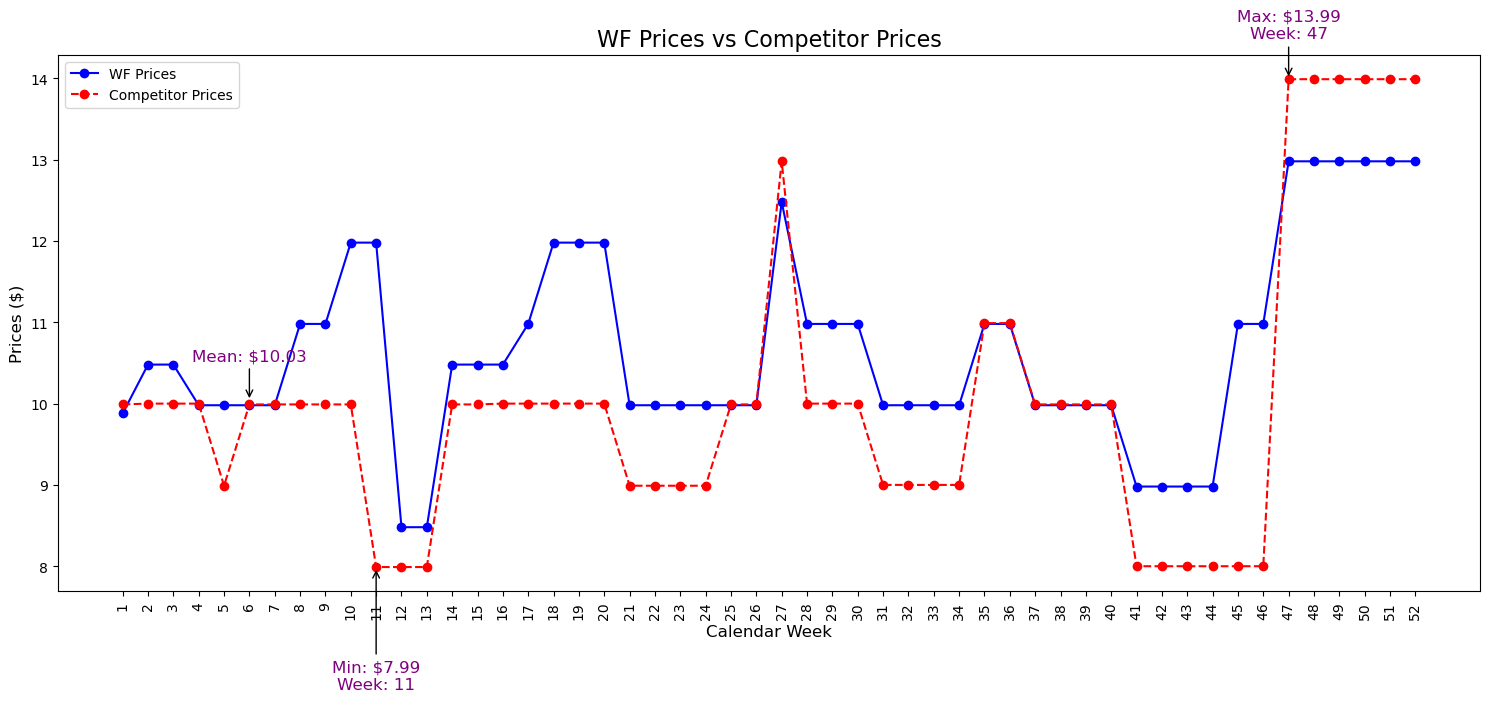

In [30]:
# Calculating key price points
min_comp_price = df['Competitor Prices'].min()
mean_comp_price = df['Competitor Prices'].mean()
max_comp_price = df['Competitor Prices'].max()

min_week = df.loc[df['Competitor Prices'] == min_comp_price, 'Calendar Week'].values[0] # finding the week corresponding to min competitor price
max_week = df.loc[df['Competitor Prices'] == max_comp_price, 'Calendar Week'].values[0] # finding the week corresponding to max competitor price

plt.figure(figsize = (15, 7))
plt.plot(df['Calendar Week'], df['WF Prices'], marker = 'o', linestyle = '-', color = 'blue', label = 'WF Prices')
plt.plot(df['Calendar Week'], df['Competitor Prices'], marker = 'o', linestyle = '--', color = 'red', label = 'Competitor Prices')

# Adding the purple arrows for min, mean, and max prices
plt.annotate(
    f"Min: ${min_comp_price:.2f}\nWeek: {min_week}",
    xy = (min_week, min_comp_price),  # pointing at the minimum value
    xytext = (min_week, min_comp_price - 1.5),  # text further below the min point
    arrowprops = dict(facecolor = 'purple', arrowstyle='->'),
    fontsize = 12, color = 'purple', ha = 'center'
)

plt.annotate(
    f"Mean: ${mean_comp_price:.2f}",
    xy = (6, mean_comp_price),  # positioning the mean annotation manually at week 6
    xytext = (6, mean_comp_price + 0.5),
    arrowprops = dict(facecolor = 'purple', arrowstyle = '->'),
    fontsize = 12, color = 'purple', ha = 'center'
)

plt.annotate(
    f"Max: ${max_comp_price:.2f}\nWeek: {max_week}",
    xy = (max_week, max_comp_price),  # pointing at the maximum value
    xytext = (max_week, max_comp_price + 0.5),  # text directly above the max point
    arrowprops = dict(facecolor = 'black', arrowstyle = '->'),
    fontsize = 12, color = 'purple', ha = 'center'
)

# IMPORTANT: -> Adjust the layout to create more space USING BOTTOM = 0.2
plt.subplots_adjust(bottom = 0.2)


plt.title('WF Prices vs Competitor Prices', fontsize = 16)
plt.xlabel('Calendar Week', fontsize = 12)
plt.ylabel('Prices ($)', fontsize = 12)
plt.xticks(df['Calendar Week'], rotation = 90)
plt.legend()

plt.tight_layout()
plt.show()

- Competitor prices remain more consistent week to week, with fewer fluctuations compared to WF (dynamic pricing).
- We can see spikes in WF prices around holidays like week 26 (4th of July), week 48 (Thanksgiving), week 52 (Christmas) etc.

If you take a look at the above graph, we can see that there's a case of **multicollinearity** between WF prices and competition due to pricing strategies. This is a situation where two or more independent variables are highly correlated with each other, making it difficult to isolate the individual effect of each variable on the dependent variable, often leading to unreliable and unstable regression coefficient estimates!

**Here, to calculate the PED, the focus should be in volume not in sales. Why? PED measures the responsiveness of quantity demanded to changes in price. Using sales instead of volume can be misleading because sales revenue is already influenced by the price. We have to remember that PED is specifically designed to capture how customer purchasing behavior (quantity demanded) responds to price changes, irrespective of revenue or profit considerations.**

In the real world, demand is influenced by multple variabels beyond price changes and customer behavior. 
Variables or key drivers that can influence demand:
- Competitor Prices (if competitor prices drop, customers may shift away regardless of loyalty).
- Discounts, promotions, campaings.
- Seasonality (holidays).
- Macroeconomic Factors.
- Stock availability (even if demand is high, stock outs will reduce actual sales).

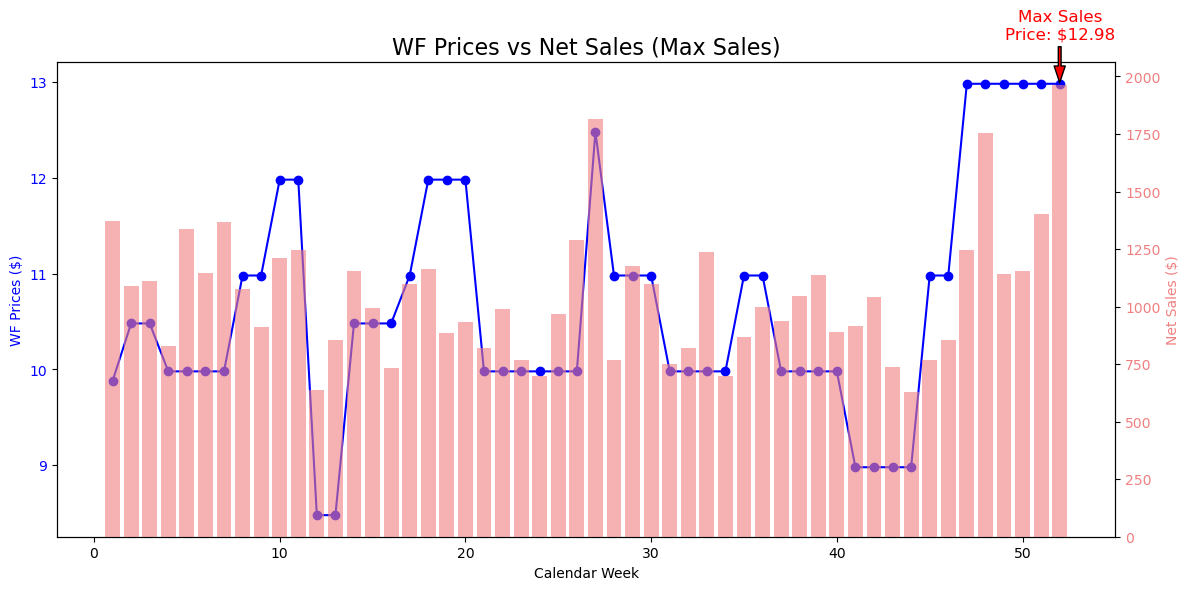

In [29]:
max_sales_row = df.loc[df['Net Sales'].idxmax()]  # Row with max Net Sales
max_sales_price = max_sales_row['WF Prices']
max_sales_week = max_sales_row['Calendar Week']
max_sales_value = max_sales_row['Net Sales']

fig, ax1 = plt.subplots(figsize = (12, 6))


color = 'blue'
ax1.set_xlabel('Calendar Week')
ax1.set_ylabel('WF Prices ($)', color = color)
ax1.plot(df['Calendar Week'], df['WF Prices'], marker = 'o', color = color, label = 'WF Prices')
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()
color = 'lightcoral'
ax2.set_ylabel('Net Sales ($)', color = color)
ax2.bar(df['Calendar Week'], df['Net Sales'], color = color, alpha = 0.6, label = 'Net Sales')
ax2.tick_params(axis = 'y', labelcolor = color)

ax2.annotate(
    f"Max Sales\nPrice: ${max_sales_price:.2f}",
    xy = (max_sales_week, max_sales_value),  # arrow tip
    xytext = (max_sales_week, max_sales_value + 200),  # arrow start
    arrowprops = dict(facecolor = 'red', shrink = 0.05, width = 2, headwidth = 8),
    fontsize = 12, color = 'red', ha = 'center'
)


plt.title('WF Prices vs Net Sales (Max Sales)', fontsize = 16)
fig.tight_layout()

plt.show()

### Log - log Transformations

$$
\ln(Q_t) = \alpha + \beta \ln(P_t) + \epsilon_t
$$

The Log-Log transformation often helps in linearizing nonlinear relationships, stabilizing variance, and making the data conform more closely to the normality assumptuion of linear regression. This technique is used to model relationship between variables when both  the dependent variable and one or more independent variables are log transformed. For PED, log-log regression is particularly useful because the elasticity of demand is the percentage change in quantity demanded resulting from a percentage change in price. By taking the logarithm of both quantity and price, the regression coefficient of the price variable directly represents the elasticity (direct estimation).


### Other Models - Experimentations

After a few years of experimenting with neural networks, dimensionality reduction, and complex machine learning algorithms, I came to understand that simplicity is key. The dataset I’m using contains straightforward information with all the necessary fields to calculate Price Elasticity of Demand (PED) and simulate demand changes. After experiencing failure with non-linear models such as random forests and decision trees (due to severe overfitting), I decided to explore Ridge Regression, Lasso Regression, and Elastic Net. However, each performed worse than its predecessor.

I will not include these experiments in this research to avoid unnecessary length. The aim is to understand the basics of something that has never been done before, which is why I’m sticking to the original linear regression model from Stats Model.

### Linear Regression - Stats Model

In [6]:
df['price_ratio'] = df['WF Prices'] / df['Competitor Prices'] # creating indexes

df['log_price_ratio'] = np.log(df['price_ratio'])
# df['log_price_ratio'] = np.log1p(df['price_ratio']) to avoid log(0) -> adding small constant

df['log_volume'] = np.log(df['Volume of Units Sold in lbs'])

$$
\text{log_price_ratio} = \log\left(\frac{\text{My Prices}}{\text{Competitor Prices}}\right)
$$

**For linear regression, my goal is to isolate and estimate price elasticity, using only the index (log_price_ratio) as the independent variable makes sense. At work, this is one my main drivers because it shows how relatively cheap or expensive our products are. Elasticity can then reveal how sensitive demand is to this relative change. Also, this independent feature makes it way much more robust than just using our prices alone, which doesn't account for external factors.**

The log transformation of price_ratio and Volume of Units Sold in lbs seen below is enough to linearize the relationship for a basic elasticity analysis. This is our only "preprocessing step" here.

In [7]:
X = df[['log_price_ratio']]  # price index for basic elasticity estimation (feature)
y = df[['log_volume']]  # log transform volume for elasticity (target)

X = sm.add_constant(X) # adding the constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_volume   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.640
Date:                Mon, 09 Dec 2024   Prob (F-statistic):            0.00497
Time:                        22:20:32   Log-Likelihood:                 11.318
No. Observations:                  52   AIC:                            -18.64
Df Residuals:                      50   BIC:                            -14.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.6171      0.034    1

The R-squared is low, this is not unusual for simple models like this, especially when only one variable is included. Additionally, the adjusted R-squared is close to the R-squared, confirming that this predictor has a measurable impact. Also, the p-value (p < 0.05) confirms that "log_price_ratio" significantly predicts changes in the volume of units sold. P = 0.005 just shows the relationship between price ratio and volume sold is unlikely due to random chance.

In [8]:
# Coefficient for log_price_ratio:

elasticity_coefficient = model.params['log_price_ratio']
print(f"Price Elasticity Coefficient: {elasticity_coefficient}")

Price Elasticity Coefficient: -0.8185910844791444


**From the above coefficient, we can infer that A 1% increase in the price ratio (Wild Fork price relative to competitor price) leads to a 0.8186% decrease in the volume of units sold. This is consistent with the concept of inelastic demand (Elasticity < 1). In the case of PLU 1155 (outsde skirt), customers are somewhat insensitive to price changes. It is important to remember that when demand is inelastic, the lost of revenue from fewer unitss sold is outweighted by the higher price per unit.**

Visualizing performance:

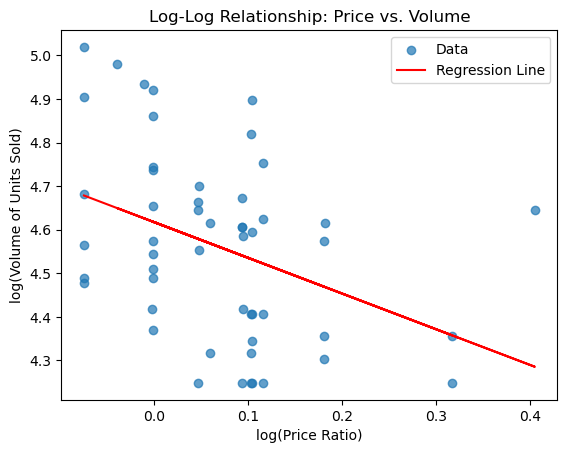

In [9]:
plt.scatter(X['log_price_ratio'], y, alpha = 0.7, label = 'Data')

reg_line = model.predict(X) # regression line
plt.plot(X['log_price_ratio'], reg_line, color = 'red', label = 'Regression Line')

plt.xlabel('log(Price Ratio)')
plt.ylabel('log(Volume of Units Sold)')
plt.title('Log-Log Relationship: Price vs. Volume')
plt.legend()
plt.show()

The above visualization shows a negative slope. The red regression line slopes downward, which reflects the negative relationship between price and quantity demanded. This aligns with economic theory: as prices increase, demand decreases. This slope of the regression line corresponds to our elasticity coefficient of -0.8185910844791444. The overall trend aligns with the log-log regression model, supporting the model's validity for calculating PED.

**The negative slope confirms the inverse relationship between price and demand.**

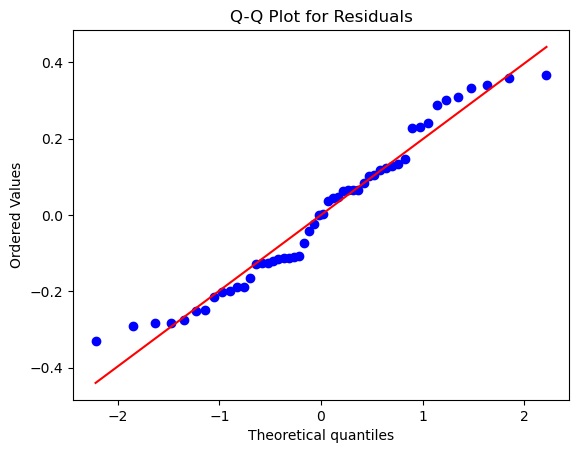

In [12]:
residuals = y.values.flatten() - model.predict(X)

stats.probplot(residuals, dist = 'norm', plot = plt)
plt.title('Q-Q Plot for Residuals')

plt.show()

Most points lie close to the diagonal, indicating that the residuals are approximately normal (residuals follow a normal distribution). This suggests the model's assumption of normality are satisfied.

### Simulating Demand

In [15]:
new_price = 11.98

df['log_price_ratio_simulated'] = np.log(new_price / df['Competitor Prices']) # recalculating log_price_ratio using the new price

# Predicting log-transformed demand for the simulated price using the coefficient from the OLS Model
intercept = model.params['const']
elasticity_coefficient = model.params['log_price_ratio']

# Predicting log_volume with the new price ratio
df['log_volume_simulated'] = intercept + elasticity_coefficient * df['log_price_ratio_simulated']

# Transforming back to original scale for volume
df['volume_simulated'] = np.exp(df['log_volume_simulated'])

# Comparing original vs. simulated demand
df['percent_change_demand'] = (df['volume_simulated'] - df['Volume of Units Sold in lbs']) / df['Volume of Units Sold in lbs'] * 100

# Calculating the average percentage change in demand
average_change = df['percent_change_demand'].mean()

print('Original vs Simulated Demand and Percentage Change:')
print(df[['Volume of Units Sold in lbs', 'volume_simulated', 'percent_change_demand']])
print(f"\nAverage Percentage Change in Demand: {average_change:.2f}%")

Original vs Simulated Demand and Percentage Change:
    Volume of Units Sold in lbs  volume_simulated  percent_change_demand
0                         139.0         87.218820             -37.252647
1                         104.0         87.290282             -16.067037
2                         106.0         87.290282             -17.650678
3                          83.0         87.290282               5.169014
4                         134.0         80.004422             -40.295208
5                         115.0         87.218820             -24.157548
6                         137.0         87.218820             -36.336628
7                          98.0         87.218820             -11.001204
8                          83.0         87.218820               5.082916
9                         101.0         87.218820             -13.644732
10                        104.0         72.642630             -30.151318
11                         75.0         72.642630              -3.143160

Observations from above results:
- volume_simulated column shows the predicted demand based on $11.98/lb.
- Demand decreases for most observations due to the higher prices (which aligns with -0.8186).
- percentage_change_demand is negative for most observations, reflecting a drop in demand due to the price increase.
- Across all observations, demand decreases by approximately 7.61% on avg due to the price increase.
- The smmall number of positive changes are likely due to the seasons (holidays).

I'm pretty sure using the real dataset will get me interesting insights. However, interactions between WF prices and Competition must be study in this section.

The Stats Model OLS linear regression is capable of making predictions just like a machine learning algoritm when requirements are met:
- Q-Q plot shows that residuals are approximately normal.
- No significant multicollinearity between volume in lbs and indexes.
- Statistically significant elasticity coefficient of -0.8186.
- The new price of $11.98/lb is not a crazy price and is within the range of the historical prices (more reliable prediction).
- The OLS model seems to avoids crazy complexities and overfitting risks often presented in machine learning algorithms.

The OLS model will not capture non-linear relationships like decision trees and random forests, which is why it is important to analyze and understand relationships at the beginning. In my case, all other features within the dataset did not contribute to improving non-linear models, and the predictions were worse. No significant positive results were found after using these models (possibly due to the limitations of my dummy dataset).

**Can price elasticity coefficients be used to predict changes in demand for key product categories after price adjustment?**

**Yes, the coefficient of -0.8186 was calculated using a linear regression model from Stats Model. This coefficient directly measures how demand responds to changes in price. Additionally, we simulated demand using a new price per pound and compared the original demand to the simulated demand, resulting in some expected changes. Data visualization also confirmed that the model met linear assumptions, making the predictions statistically reliable. Things to consider from now on:**
- New prices must remain within the historical price range.
- External factors, such as seasonality, must remain stable.
- Regression model assumptions must always be met for this model and its predictions to work.

# Key Question 2:

**Is it possible to conduct a sensitivity analysis to simulate pricing scenarios and their impact on the Days on Hand (DOH)?**

$$
\text{DOH} = \frac{\text{Inventory}}{\text{Daily Sales Rate}}
$$

The daily sales rate can be obtained from predicted demand:

$$
\text{Daily Sales Rate} = \frac{\text{Predicted Demand}}{\text{Days in Period}}
$$


**We could definetly use the linear regression model to predict changes in demand for different pricing scenarios**. We could recalculate the log_price_ratio for each price and simulate demand and use this predicted demand to calculate the daily sales rate for each scenario.


## Price Sensitivty Analysis

In [6]:
price_scenarios = [8.98, 10.98, 12.98]  # different prices (depends also on competition)

current_inventory = 1000  # current inventory level in lbs (this is what I really want)
days_in_period = 7 # 7 days

sensitivity_results = pd.DataFrame(columns = ['Price', 'Predicted Demand', 'Daily Sales Rate', 'DOH']) # dataframe to store results

for new_price in price_scenarios:
    df['log_price_ratio_simulated'] = np.log(new_price / df['Competitor Prices']) # recalculating the log_price_ratio (log index)

    # Predicting demand
    df['log_volume_simulated'] = model.params['const'] + model.params['log_price_ratio'] * df['log_price_ratio_simulated']
    df['volume_simulated'] = np.exp(df['log_volume_simulated'])  # converting back from log scale
    total_predicted_demand = df['volume_simulated'].sum()  # total demand for the period

    # Calculating daily sales rate and DOH
    daily_sales_rate = total_predicted_demand / days_in_period # daily sales
    doh = current_inventory / daily_sales_rate # DOH

    # Results
    sensitivity_results = sensitivity_results.append({
        'Price': new_price,
        'Predicted Demand': total_predicted_demand,
        'Daily Sales Rate': daily_sales_rate,
        'DOH': doh
    }, ignore_index = True)

sensitivity_results

,Price,Predicted Demand,Daily Sales Rate,DOH
0,8.98,5750.557886,821.508269,1.217273
1,10.98,4877.819119,696.831303,1.435068
2,12.98,4253.405143,607.629306,1.645740


The above results show that as the price increase from 8.98/lb to 12.98/lb the predicted demand decreases from 5,750 units to 4,253 as expected due to the negative price elasticity. This aligns with the economic idea that higher prices reduce demand, especially for elastic or moderately inelastic goods. We can analyze the daily sales rate the same way (8.98/lb -> 822 units/day and 12.98 -> 608 units/day) which is logical because daily sales obtain from total demand over a fixed period (7 days). The DOH calculations also make sense because higher prices reduce demand, which slows inventory turnover, leading to more days of inventory on hand. The real data will give me very good insights!

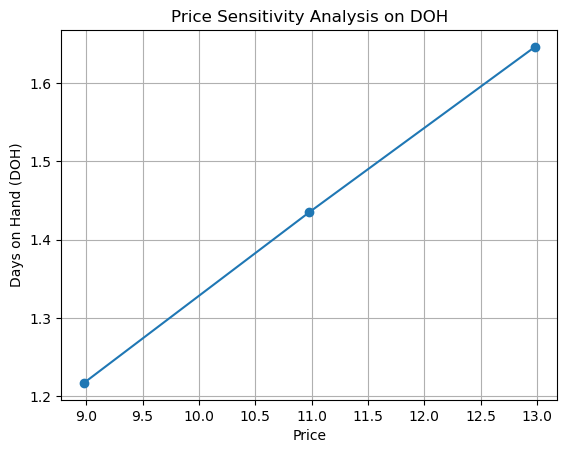

In [7]:
plt.plot(sensitivity_results['Price'], sensitivity_results['DOH'], marker = 'o')
plt.xlabel('Price')
plt.ylabel('Days on Hand (DOH)')
plt.title('Price Sensitivity Analysis on DOH')
plt.grid()

plt.show()

The above graph shows a posiitve linear relationship between price and DOH. As the pricr increases, inventory takes longer to clear leading to higher DOH. This is just to understand the trade off between pricing and inventory turnover. Obviously, if the goal is to optimize inventory turnover (minimizing DOH) then a lower price point like $8.98/lb is more favorable. At a higher price, slower inventory turnover means we might need less frequent restocking, but there's still the risk of overstocking if demand drops significantly.

We could do a quick revenue calculation to understand the trade off between pricing, demand, and total revenue:

In [8]:
df['simulated_revenue'] = df['volume_simulated'] * new_price
sensitivity_results['Revenue'] = [price * demand for price, demand in zip(sensitivity_results['Price'], sensitivity_results['Predicted Demand'])]

sensitivity_results

,Price,Predicted Demand,Daily Sales Rate,DOH,Revenue
0,8.98,5750.557886,821.508269,1.217273,51640.009814
1,10.98,4877.819119,696.831303,1.435068,53558.453925
2,12.98,4253.405143,607.629306,1.645740,55209.198758


Revenue: 

$$
\text{Revenue} = \text{Price} \times \text{Demand}
$$



Want to calculate profit margin at each price point? Let's incorporate COGS (Cost of Good Sold).

$$
\text{Profit Margin (%)} = \frac{\text{Revenue} - \text{Total COGS}}{\text{Revenue}} \times 100
$$


In [10]:
price_scenarios = [8.98, 10.98, 12.98]  # different prices (depends also on competition)

current_inventory = 1000  # current inventory level in lbs (this is what I really want)
days_in_period = 7 # 7 days
COGS = 6.00 # cogs per plu

sensitivity_results = pd.DataFrame(columns = ['Price', 'Predicted Demand', 'Daily Sales Rate', 'DOH']) # dataframe to store results

for new_price in price_scenarios:
    df['log_price_ratio_simulated'] = np.log(new_price / df['Competitor Prices']) # recalculating the log_price_ratio (log index)

    # Predicting demand
    df['log_volume_simulated'] = model.params['const'] + model.params['log_price_ratio'] * df['log_price_ratio_simulated']
    df['volume_simulated'] = np.exp(df['log_volume_simulated'])  # converting back from log scale
    total_predicted_demand = df['volume_simulated'].sum()  # total demand for the period

    # Calculating daily sales rate and DOH
    daily_sales_rate = total_predicted_demand / days_in_period # daily sales
    doh = current_inventory / daily_sales_rate # DOH
    
    # Calculating revenue and profit margin
    total_revenue = new_price * total_predicted_demand # total revenue
    total_cogs = COGS * total_predicted_demand # total cogs
    profit_margin = (total_revenue - total_cogs) / total_revenue * 100

    sensitivity_results = sensitivity_results.append({
        'Price': new_price,
        'Predicted Demand': total_predicted_demand,
        'Daily Sales Rate': daily_sales_rate,
        'DOH': doh,
        'Revenue': total_revenue,
        'Profit Margin': profit_margin
    }, ignore_index = True)


sensitivity_results

,Price,Predicted Demand,Daily Sales Rate,DOH,Profit Margin,Revenue
0,8.98,5750.557886,821.508269,1.217273,33.184855,51640.009814
1,10.98,4877.819119,696.831303,1.435068,45.355191,53558.453925
2,12.98,4253.405143,607.629306,1.645740,53.775039,55209.198758


As a Pricing Analyst, my primary responsibility is to focus on the customer, so margin is not my main concern. On the other hand, this metric is extremely important to the Product Development team.

## Average Basket Size

We can ccalculate the average basket size with price sensitivity to understand how pricing impacts different patterns.

AVG Basket Size:

$$\text{avg_basket_size} = \frac{\text{Transactions}}{\text{Volume of Units Sold in lbs}}$$

- Price sensitive customers: Tend to reduce purchases when prices increase.
- Bulk buyers: Tend to buy more in fewer transactions, increasing the average basket size.
- Loyal customers: Continue purchasing regardless of price changes.


Cluster customers using techniques like K-Means base don variables like:
- Frequency of transactions.
- AVG speding per transaction.
- Total volume purchased.

We could segment basket sizes across different customer groups and analyze how pricing changes impact each segment.

In [4]:
df['Avg_Spend'] = df['Net Sales'] / df['Transactions']  # avg spending per transaction
df['Basket_Size'] = df['Volume of Units Sold in lbs'] / df['Transactions']  # avg basket size calculation

# Normalizing the data
scaler = StandardScaler()
features = ['Transactions', 'Avg_Spend', 'Volume of Units Sold in lbs', 'Basket_Size', 'Gross Margin %']
normalized_data = scaler.fit_transform(df[features])

# K-Means cluster
kmeans = KMeans(n_clusters = 3, random_state = 42)  # 3 clusters based on the three above scenarios (price sensitive, bulk, loyal)
df['Cluster'] = kmeans.fit_predict(normalized_data)

In [5]:
cluster_comparison = df.groupby('Cluster')[[
    'Transactions', 'Avg_Spend', 'Basket_Size', 
    'Volume of Units Sold in lbs', 'Gross Margin %', 
    'Days on Hand (inventory)'
]].mean()

cluster_comparison = cluster_comparison.reset_index()
cluster_comparison

,Cluster,Transactions,Avg_Spend,Basket_Size,Volume of Units Sold in lbs,Gross Margin %,Days on Hand (inventory)
0,0,60.866667,19.909866,1.786944,102.506667,0.448667,9.466667
1,1,14.958333,68.959992,6.311987,92.179167,0.456250,9.833333
2,2,24.692308,44.400031,4.511548,103.000000,0.319231,10.000000


- Cluster 0: high frequency/low spend customers. These customers make many transactions (60.87 on avg) but spend less per transaction (Avg_Spend = $19.91) and purchase smaller quantities (Basket_Size = 1.79). Their lower spending per transaction indicates that they might be price sensitive or prefer smaller, frequent purchases.

- Cluster 1:low frequency/high spending customers. They make fewer transactions (14.96 on average) but spend significantly more per transaction (Avg_Spend = $68.96) and purchase larger quantities (Basket_Size = 6.31). These customers are likely less price sensitive and are willing to pay more for quality or convenience.

- Cluster 1: moderate/mid spend customers. They make a moderate number of transactions (24.69) with a decent average spend (Avg_Spend = $44.40) and basket size (Basket_Size = 4.51). However, their gross margin (31.92%) is the lowest, indicating that they might be more price-sensitive than other clusters.


We could craft special recommendation for each cluster based on the above performance (promotions, loyalty programs, special discounts etc).

**Is it possible to conduct a sensitivity analysis to simulate pricing scenarios and their impact on the Days on Hand (DOH)? Yes, it is possible to conduct a sensitivity analysis to simulate pricing scenarios and their impact on DOH. Using the PED linear regression model from Stats Model, we demonstrated how different price points affect DOH, demand, and revenue which will help making informed pricing and inventory decisions.**

## Additional Question: What happened to Pumpkin Pie?

Thanksgiving has products that have high demand during Week 47 and Week 48 (Thanksgiving) of the year. Let's say the pumpkin pie faces sales challenges? Last year we sold more pie than the current year. Due to this, price has undergone few reductions to try and move that overstock inventory fast. What happened to this item is an scenario of seasonality and inventory management challenge. Customer were likely willing to pay higher price becase the product matched their holiday needs. This is a seasonality effect, where demand naturally increases during specific periods, in this case thanksgviing.

Overstock resulted in:
- Increased on DOH
- Forced markdown to clear inventory, potentially affecting profit margins

Pumpkin pie might be a price sensitive product (elastic), were high price might lead to sharp drops in demand outside the peak holiday period (right after Thanksgiving).

Future approaches:
- Identify peak sales periods.
- Predict teh expected drop off after Thanksgiving.
- Sensitivity analysis using regression model to simulate pricing scenario impact.

We could use the regression model and incorporate historical data from previous years to predict future demand and inventory requirements. This approach will leverage seasonality, historical trends, and the price elasticity model to predict demand and optimize inventory planning and management.

# Key Question 3:

**What are the most impactful features for sales prediction, and how can feature selection techniques improve model performance? Testing Linear vs Non-Linear Models.**

In [2]:
df = pd.read_csv('fake_wf2.csv') # contains volume in lbs from 2023
df.head()

,PLU,Product Category,Product Description,Calendar Year,Calendar Week,COGS,Volume of Units Sold in lbs,Days on Hand (inventory),Competitor Prices,WF Prices,Net Sales,Gross Margin %,Discounts,Volume of Units,Transactions,Volume of Units Sold in lbs (2023)
0,1155,Beef,Outside Skirt,2024,1,6.36,139.0,8,9.99,9.88,1373.32,0.36,0.54,93,93,136
1,1155,Beef,Outside Skirt,2024,2,5.38,104.0,11,10.00,10.48,1089.92,0.49,1.79,70,18,113
2,1155,Beef,Outside Skirt,2024,3,5.48,106.0,7,10.00,10.48,1110.88,0.48,0.53,71,18,111
3,1155,Beef,Outside Skirt,2024,4,6.55,83.0,12,10.00,9.98,828.34,0.34,1.28,56,56,85
4,1155,Beef,Outside Skirt,2024,5,6.95,134.0,14,8.99,9.98,1337.32,0.30,1.94,90,90,125


**We could also add a small contsnat of +1 to avoid log(0) in the future**.

I decided to generate a new dataset using ChatGPT that includes the volume sold in lbs for the year 2023. This new column will simulate the past year's demand for 2023, with the intent of feeding more features into the models. To achieve this, I asked ChatGPT to estimate the past-year demand based on the volume of units in lbs for 2024, adjusted with a random variability of ±10%. This adjustment simulates 2023's demand with minor variability of ±10% to represent realistic fluctuations from the previous year.

Additionally, I will incorporate other new features into the model, such as "avg_basket_size" and "seasonality." We will log-transform fields like competitor prices, WF prices, net sales, and COGS. Adding more features to the models could potentially lead to much more accurate results. Let’s see if this approach provides valuable insights, unlike the previous failed experiments in the PED section.

AVG Basket Analysis:

$$\text{avg_basket_size} = \frac{\text{Transactions}}{\text{Volume of Units Sold in lbs}}$$


## Feature Engineering

In [3]:
df['log_price_ratio'] = np.log1p(df['Competitor Prices'] / df['WF Prices'])
df['past_year_demand'] = df['Volume of Units Sold in lbs'] - df['Volume of Units Sold in lbs (2023)']
df['avg_basket_size'] = df['Transactions'] / df['Volume of Units']

**Let's add some seasonality, for each week number in the calendar week, assigns 1 if the week is a holiday week and 0 otherwise (binary features).**

In [4]:
holiday_weeks = [26, 27, 48, 52] # adding some holidays into the data -> 4th of July, Labor Day, Thanksgivig, Christmas, and New Years
df['seasonality'] = df['Calendar Week'].apply(lambda x: 1 if x in holiday_weeks else 0)

In [5]:
# Log trnsforming the columns
for col in ['COGS', 'Volume of Units Sold in lbs', 'Competitor Prices', 'WF Prices', 'Net Sales', 'Discounts']:
    df[f'log_{col}'] = np.log1p(df[col]) # adding the small constant won't hurt

## Preparing Features

In [6]:
X = df[['log_price_ratio', 'past_year_demand', 'seasonality', 'avg_basket_size', 
        'log_COGS', 'log_Volume of Units Sold in lbs', 'log_Competitor Prices', 
        'log_WF Prices', 'log_Net Sales', 'log_Discounts', 'Gross Margin %']]

y = df['Net Sales']  # revenue target variable

In [7]:
# Because of the how small my dataset is, let's increase the test size

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42) # 70% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42) # 15% validtion and testing

## RFE Model

We could use RFE as a feature selection method before fitting to regularized models such as Ridge, Lasso, and Random Forest. This will help remove the least important features and evaluate the model performance.

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(model, n_features_to_select = 5) # let's select 5
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [9]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['log_price_ratio', 'log_Volume of Units Sold in lbs',
       'log_Competitor Prices', 'log_WF Prices', 'log_Net Sales'],
      dtype='object')


In [10]:
X_train_rfe = X_train[selected_features]
X_val_rfe = X_val[selected_features]
X_test_rfe = X_test[selected_features]

It's impressive that, once again, just like in my non document model experimentation for the PED, the selection aligns with the economic principle: pricing, demand, and revenue are key drivers in sales prediction. Similarly, in the real world, incorporating the index (my price/competition) highlights that relative pricing plays a major role in predicting sales.

The reason I decided to use RFE is that it is a wrapper method that evaluates the importance of features based on the linear regression model. When I worked on the PED model, Ridge, Lasso, Elastic Net, Random Forest, and Decision Trees all produced inconsistent results due to the simplicity of the pricing data similar to real world scenarios. The data within Snowflake is just as simple as the dummy datasets I previously experimented with, so I will stick to the Linear Regression model wihtout complicating myself.

From my past experimentations:

- Lasso: Dropped the most important correlated features.
- Ridge: Useful if we expect all features within the data to contribute, as it retains all features but reduces their impact.
- Non-linear models (Random Forest and Decision Trees): More suitable for complex data but prone to overfitting.

## Training

In [12]:
model.fit(X_train_rfe, y_train)

LinearRegression()

In [13]:
y_train_pred = model.predict(X_train_rfe)

In [14]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
train_r2 = r2_score(y_train, y_train_pred)

## Validation

In [15]:
y_val_pred = model.predict(X_val_rfe)

In [16]:
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_r2 = r2_score(y_val, y_val_pred)

## Testing

In [17]:
y_test_pred = model.predict(X_test_rfe)

In [18]:
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
test_r2 = r2_score(y_test, y_test_pred)

## Metrics Performance

In [19]:
metrics = {
    'Set': ['Training', 'Validation', 'Testing'],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'R^2': [train_r2, val_r2, test_r2]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Set,RMSE,R^2
0,Training,35.507034,0.979918
1,Validation,61.244814,0.974160
2,Testing,38.567854,0.954225


**R-Squared:**

- 97.99% of the variance in the training data.
- 97.42% of the variance on unseen validation data, which is very close to training.
- 95.42% of the variance on the final test data.

**RMSE:**
- Training Low error on the training set indicates the model fits the training data well.
- Validation: Higher than training, which is expected since the model is applied to unseen data.
- Testing: Closer to training RMSE, indicating the model performs well on unseen data.


**These scores indicate a well generalized and balanced model with minimal overfitting, as there is only a slight drop in R-squared from training to testing. Obviously, this model is not perfect, but the test RMSE is close to the training RMSE, which is a strong indicator of model generalization. In the future, i could try some cross validation to ensure the results are no dependent on a specific data split.**

## Sales Prediction: Linear Regression

In dynamic pricing, my goal is to predict sales for the near future (next week. This ensures predictions relfect current market dynamics. In the below, we're calculating the current averages for the most recent weeks. Observation, yearly avgs are more suitable for longer-term pricing forecasting.

In [19]:
recent_data = df[
    (df['PLU'] == 1155) & 
    (df['Calendar Year'] == 2024) & 
    (df['Calendar Week'] >= df['Calendar Week'].max() - 4)]

avg_volume_lbs = recent_data['Volume of Units Sold in lbs'].mean() # avg
avg_net_sales = recent_data['Net Sales'].mean() # avg
avg_competitor_price = recent_data['Competitor Prices'].mean() # avg

In [23]:
price_scenarios = [9.98, 10.48, 10.98] # min, mean, max of the WF data

In [24]:
scenario_data = []

for price in price_scenarios:
    log_wf_price = np.log1p(price)
    log_competitor_price = np.log1p(avg_competitor_price)
    log_price_ratio = np.log1p(avg_competitor_price / price)
    log_volume_lbs = np.log1p(avg_volume_lbs)
    log_net_sales = np.log1p(avg_net_sales)
    
    scenario_data.append([log_price_ratio, log_volume_lbs, log_competitor_price, log_wf_price, log_net_sales])

In [25]:
scenario_df = pd.DataFrame(scenario_data, columns = selected_features)

In [26]:
sales_predictions = model.predict(scenario_df) # simple linear regression model

In [27]:
predicted_sales = pd.DataFrame({
    'WF Price': price_scenarios,
    'Predicted Sales': sales_predictions
})

predicted_sales

,WF Price,Predicted Sales
0,9.98,-11974.281872
1,10.48,-9486.861842
2,10.98,-7108.287257


**What does this means?**

Linear regression assumes a straight line relationship between features like volume, pricing, and target sales. However, in the real world the relationship between price and sales are often non-linear. Linear regression oversimplifies these dynamics, leading to poor performance for certain price points. The above negative predicted sales results are unrealistic. What to do in this case? real world/non-linear relationship? Let's try **Random Forest**!

Random Forest uses multiple decision trees to better balance the influence of different features. It will capture the interaction and importance of multiple features withouth assuming the linearity.

## Sales Prediction: Random Forest

In [20]:
# from sklearn.ensemble import RandomForestRegressor

In [21]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train_rfe, y_train)

RandomForestRegressor(random_state=42)

In [22]:
price_scenarios = [9.98, 10.48, 10.98] # again min mean max

In [23]:
recent_data = df[
    (df['PLU'] == 1155) & 
    (df['Calendar Year'] == 2024) & 
    (df['Calendar Week'] >= df['Calendar Week'].max() - 4)
]
avg_volume_lbs = recent_data['Volume of Units Sold in lbs'].mean()
avg_net_sales = recent_data['Net Sales'].mean()
avg_competitor_price = recent_data['Competitor Prices'].mean()

In [24]:
scenario_data = []

for price in price_scenarios:
    log_wf_price = np.log1p(price)
    log_competitor_price = np.log1p(avg_competitor_price)
    log_price_ratio = np.log1p(avg_competitor_price / price)
    log_volume_lbs = np.log1p(avg_volume_lbs)
    log_net_sales = np.log1p(avg_net_sales)
    
    scenario_data.append([log_price_ratio, log_volume_lbs, log_competitor_price, log_wf_price, log_net_sales])

In [25]:
scenario_df = pd.DataFrame(scenario_data, columns = selected_features)

In [26]:
rf_sales_predictions = rf_model.predict(scenario_df)

In [27]:
rf_predicted_sales = pd.DataFrame({
    'WF Price': price_scenarios,
    'Predicted Sales': rf_sales_predictions
})

rf_predicted_sales

,WF Price,Predicted Sales
0,9.98,1296.9295
1,10.48,1292.4001
2,10.98,1276.2167


The predicted sales values decrease slightly as the price increases. Now, this makes sense:

- Lower prices typically attract higher demand.
- The difference between the highest predicted sales (9.98/lb: 1296.93 units) and the lowest (10.98/lb: 1276.22 units) is only around 20 units.

Howeever, real data will lead to real and more insightful results.

Let's try calculate the Revenue:

$$
\text{Revenue} = \text{Price} \times \text{Predicted Sales}
$$

In [28]:
rf_predicted_sales['Revenue'] = rf_predicted_sales['WF Price'] * rf_predicted_sales['Predicted Sales']
rf_predicted_sales

,WF Price,Predicted Sales,Revenue
0,9.98,1296.9295,12943.356410
1,10.48,1292.4001,13544.353048
2,10.98,1276.2167,14012.859366


**Most important feature from the Random Forest Model -> Log_NetSales.**

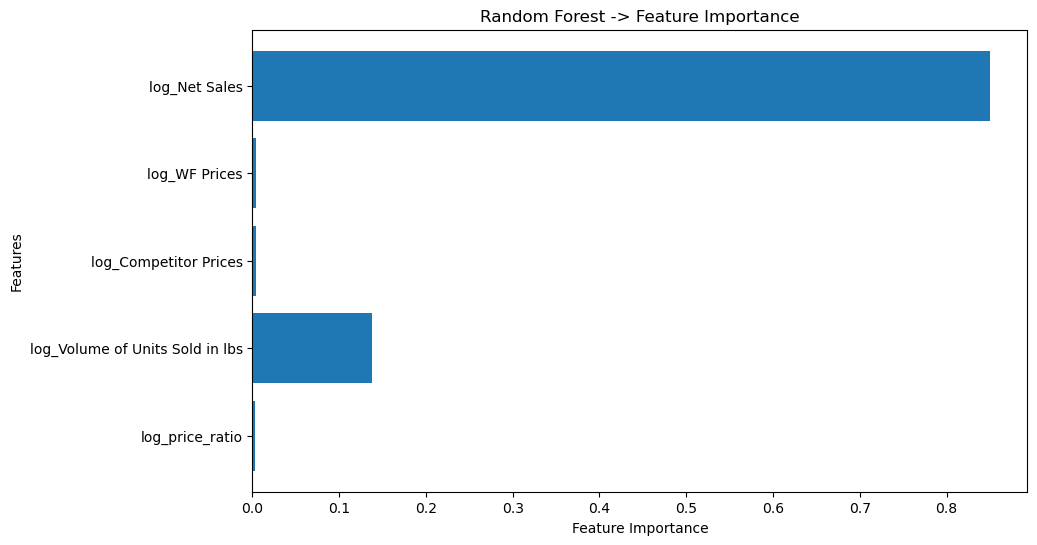

In [29]:
feature_importances = rf_model.feature_importances_
features = X_train_rfe.columns


plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest -> Feature Importance')
plt.show()

Let's quickly analyze if the model had a good performance:

In [30]:
train_rmse = mean_squared_error(y_train, rf_model.predict(X_train_rfe), squared = False)
val_rmse = mean_squared_error(y_val, rf_model.predict(X_val_rfe), squared = False)
rmse_test = mean_squared_error(y_test, rf_model.predict(X_test_rfe), squared = False)

train_r2 = r2_score(y_train, rf_model.predict(X_train_rfe))
val_r2 = r2_score(y_val, rf_model.predict(X_val_rfe))
test_r2 = r2_score(y_test, rf_model.predict(X_test_rfe))

train_mae = mean_absolute_error(y_train, rf_model.predict(X_train_rfe))
val_mae = mean_absolute_error(y_val, rf_model.predict(X_val_rfe))
test_mae = mean_absolute_error(y_test, rf_model.predict(X_test_rfe))

In [32]:
metrics_rf_df = {
    'Set': ['Training', 'Validation', 'Testing'],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'R^2': [train_r2, val_r2, test_r2],
    'MAE': [train_mae, val_mae, test_mae]
}

metrics_rf_df = pd.DataFrame(metrics_rf_df)
metrics_rf_df

,Set,RMSE,R^2,MAE
0,Training,38.432758,0.976473,12.795311
1,Validation,82.749574,0.952828,61.767575
2,Testing,38.567854,0.987273,16.187350


- Both R-squared for training and testing are very strong. Indicating the model fits well and generalizes effectively for unseen test data.
- Low RMSE and MAE for the test set suggest the model performs very well on unseen data that resembels the training distirbution.
- The residual variability could indicate some room for imporvement (cross valdiation).

## Conclusion

**What are the most impactful features for sales prediction, and how can feature selection techniques improve model performance? what the most impactful features are for sales prediction and how feature selection techniques can improve model’s performance. By selecting the top 5 most impactful features, we simplified the model without losing predictive accuracy. Obviously, this reduced the risk of overfitting by removing irrelevant features. One important thing to note here is that even with fewer features, the Random Forest model achieved good R-squared scores demonstrating that feature selection retained the most predictive information!**

Linear Regression vs Random Forest

**The Random Forest model showed better generalization for sales prediction. The "log_net_sales" were the most dominant feature withi the dataset contributing nearly 90% of the predictive power.**

# Key Question 4:

**Can we segment my pricing strategies by income level (regionally) to maximize customer accessibility and profitabilty?**

Regional pricing is very important because companies may set lower prices to attract price sensitive customers, while in less competitive regions, higher prices may be sustainable. This strategy could also help manage supply chain issues. For example, a surplus of PLU 1155 in one store may lead to regional discounts to quickly push that inventory.

The following information can be easily found in Snowflake. I don’t feel it is necessary to generate a huge dataset when regional pricing can be analyzed in a more targeted way. The Southwest (SW) region is a focus area that we will be exploring very soon, with intentions of modeling pricing strategies based on income ranges in the future.

The following dummy dataframes contain cities from the SW region, median income sourced from Google search (although BLS should be the direct source), sales volume, discount binary data features, average historical prices, and competition data.

In [40]:
# Dummy BLS and Google Search data for SW region
bls_income_data = pd.DataFrame({
    'Region': ['Fort Worth', 'Dallas', 'Plano', 'Irving', 'Arlington'],
    'Median_Income': [37699, 37395, 52926, 39682, 35917]
})

# Dummy sales data for the SW region
sales_data = pd.DataFrame({
    'PLU': [1155, 1155, 1155, 1155, 1155],
    'Region': ['Fort Worth', 'Dallas', 'Plano', 'Irving', 'Arlington'],
    'Price': [9.98, 10.98, 11.98, 8.98, 12.98], # current pricing for each city wihtin the region
    'Sales_Volume': [1200, 1500, 800, 950, 1100],
    'Discount_Flag': [0, 1, 0, 1, 0]
})

# Dummy historical pricing data for the same PLU and region
pricing_data = pd.DataFrame({
    'Region': ['Fort Worth', 'Dallas', 'Plano', 'Irving', 'Arlington'],
    'Avg_Historical_Price': [9.50, 10.25, 11.00, 9.80, 9.60],
    'Competitor_Price': [9.89, 10.00, 12.25, 9.99, 11.80]
})

We wil apply log transformation into the price elasticity function including the the small constant to get much more precise estimates. We're also including optimal pricing to it to identify the pric epoint within each income segment (low, middle, high)

In [41]:
# Merging the data
merged_data = sales_data.merge(bls_income_data, on = 'Region', how = 'left')
merged_data = merged_data.merge(pricing_data, on = 'Region', how = 'left')

# Segmenting SW region by income levels
def income_segment(income):
    if income < 38000: # low income based on media income scenarios
        return 'Low Income'
    elif 38000 <= income <= 50000: # middle income range
        return 'Middle Income'
    else:
        return 'High Income'

merged_data['Income_Segment'] = merged_data['Median_Income'].apply(income_segment)

# Elasticity -> using log-log transformation
def calculate_elasticity(df):
    df['log_price'] = np.log1p(df['Price'])
    df['log_sales'] = np.log1p(df['Sales_Volume'])
    coefficients = np.polyfit(df['log_price'], df['log_sales'], deg = 1)
    return coefficients[0] # coefficient

elasticity_results = []
for segment in merged_data['Income_Segment'].unique():
    segment_data = merged_data[merged_data['Income_Segment'] == segment]
    elasticity = calculate_elasticity(segment_data)
    elasticity_results.append({'Income_Segment': segment, 'Elasticity': elasticity})

elasticity_df = pd.DataFrame(elasticity_results)

# Optimal pricing
optimal_prices = []
for segment in merged_data['Income_Segment'].unique():
    segment_data = merged_data[merged_data['Income_Segment'] == segment]
    segment_data['Revenue'] = segment_data['Price'] * segment_data['Sales_Volume'] # revenue = price x sales volume
    max_revenue_row = segment_data.loc[segment_data['Revenue'].idxmax()] # getting price with maximum revenue
    optimal_prices.append({'Income_Segment': segment, 'Optimal_Price': max_revenue_row['Price']})

optimal_prices_df = pd.DataFrame(optimal_prices)

In [43]:
result_df = pd.merge(elasticity_df, optimal_prices_df, on = 'Income_Segment')

region_mapping = merged_data[['Region', 'Income_Segment']].drop_duplicates()
result_df = pd.merge(result_df, region_mapping, on = 'Income_Segment')

result_df = result_df[['Region', 'Income_Segment', 'Elasticity', 'Optimal_Price']]

result_df

,Region,Income_Segment,Elasticity,Optimal_Price
0,Fort Worth,Low Income,-0.550354,10.98
1,Dallas,Low Income,-0.550354,10.98
2,Arlington,Low Income,-0.550354,10.98
3,Plano,High Income,1.304095,11.98
4,Irving,Middle Income,1.490386,8.98


- 0.55 indicates inelastic demand: customers in these regions are less sensitive to price changes.
- Price increases won’t significantly reduce sales, so maintaining the price at 10.98/lbs reasonable.
- 1.30 and 1.49 indicate elastic demand, customeres here are price sensitive.
- Lowering price to 8.98/lb in Irving will maximize sales and revenue

Low income (10.98), middle income (lower prices to 8.98/lb to capture more sales), and hgh income (prices at 11.98/lb for maximum profitability.

**Can we segment my pricing strategies by income level (regionally) to maximize customer accessibility and profitabilty? Yes, by analyzing regional income ranges, we could set lower prices in price sensitive areas to attract customers and higher prices in regions with stronger purchasing power to maximize margins.**